In [9]:
#Import Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter

In [10]:
#Import csv data set:
df = pd.read_csv(r'D:\Data test\CSV file\datasetsAirbnb.csv')

In [11]:
#Check some dataset information:
df.shape

(20770, 22)

In [12]:
pd.set_option('display.max_columns',22) #Set display max column is 22
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30.0,3.0,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30.0,9.0,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2.0,6.0,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30.0,156.0,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30.0,11.0,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [13]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
20765,2.473690e+07,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,30.0,124.0,29/09/23,1.81,1.0,157.0,12.0,No License,4.75,1,1,1
20766,2.835711e+06,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,30.0,56.0,01/07/23,0.48,1.0,0.0,1.0,No License,4.46,1,2,1
20767,5.182527e+07,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,30.0,60.0,08/12/23,2.09,1.0,0.0,27.0,No License,4.93,1,1,1
20768,7.830000e+17,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,30.0,7.0,17/09/23,0.91,1.0,363.0,7.0,No License,5,1,1,1
20769,5.660000e+17,Rental unit in Queens · ★4.89 · 1 bedroom · 1 ...,93827372,Glenroy,Queens,Rosedale,40.658874,-73.728651,Private room,102.0,1.0,63.0,10/12/23,4.50,1.0,0.0,62.0,OSE-STRREG-0000513,4.89,1,1,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [15]:
#Check Value of Coulumns 'baths'
Counter(df['baths'])
#13 values 'Not specified', so drop 13 row that have 'Not specified' value and change type values of 'baths' from 'object' to 'float'

Counter({'1': 17026,
         '2': 2083,
         '1.5': 1001,
         '2.5': 240,
         '3': 171,
         '0': 82,
         '4': 69,
         '3.5': 50,
         '4.5': 18,
         'Not specified': 13,
         '5': 6,
         '6': 4,
         '5.5': 2,
         '6.5': 2,
         '11.5': 1,
         '7': 1,
         '15.5': 1})

In [16]:
df.drop(df['baths'][df['baths'] =='Not specified'].index, inplace = True)

In [17]:
#Change id and host_id into object data type
df['id'] = df['id'].astype('object')
df['host_id'] = df['id'].astype('object')
#Change 'last_review' from oject to datetime:
df['last_review'] = pd.to_datetime(df['last_review'])
#Change type values of 'baths' from 'object' to 'float':
df['baths'] = df['baths'].astype('float')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8880\1242803285.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_review'] = pd.to_datetime(df['last_review'])


In [18]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,45277537.0,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30.0,9.0,2023-01-05,0.24,139.0,364.0,2.0,No License,4.67,2,1,1.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,971000000000000000.0,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2.0,6.0,2023-12-18,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1.0
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,3857863.0,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30.0,156.0,2023-09-17,1.38,2.0,363.0,12.0,No License,4.64,1,1,1.0
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,40896611.0,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30.0,11.0,2023-03-12,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1.0
5,49584983.0,Rental unit in New York · ★5.0 · 1 bedroom · 1...,49584983.0,Jeniffer,Manhattan,Hell's Kitchen,40.759950,-73.992960,Entire home/apt,115.0,30.0,5.0,2023-07-29,0.16,139.0,276.0,2.0,No License,5,1,1,1.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20757 entries, 1 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20757 non-null  object        
 1   name                            20757 non-null  object        
 2   host_id                         20757 non-null  object        
 3   host_name                       20757 non-null  object        
 4   neighbourhood_group             20757 non-null  object        
 5   neighbourhood                   20750 non-null  object        
 6   latitude                        20750 non-null  float64       
 7   longitude                       20750 non-null  float64       
 8   room_type                       20750 non-null  object        
 9   price                           20723 non-null  float64       
 10  minimum_nights                  20750 non-null  float64       
 11  number_

In [20]:
#Check null data:
df.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

In [21]:
#Drop null data
df.dropna(inplace = True)
#Check Null data agrin
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [22]:
#Check total Duplicate data:
df[df.duplicated()].count()
#Remove Duplicate data:
df.drop_duplicates(inplace = True)

In [23]:
# #Checking for outlier data using IQR:
# q3 =df['price'].quantile(0.75)
# q1 = df['price'].quantile(0.25)
# iqr = q3 - q1
# upper = q3 + 1.5*iqr
# lower = q1 - 1.5*iqr
# df['price'][(df['price'] > upper) | (df['price'] < lower)].count()

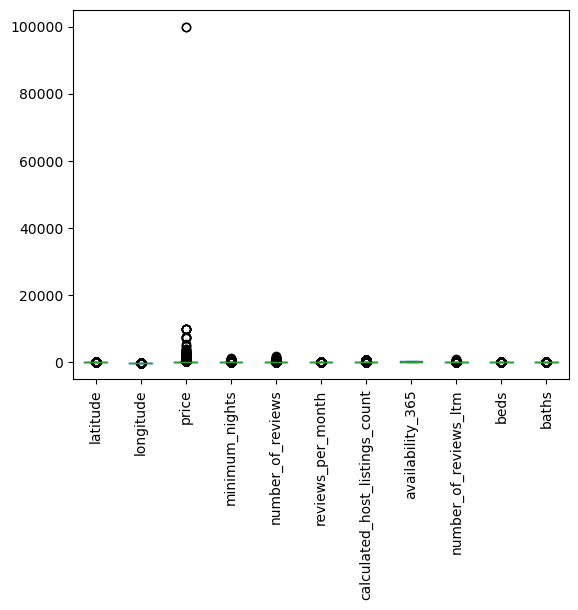

In [24]:
#Check Outlier: 
#Visual outlier data of columns:
df.plot(kind='box')
plt.tick_params(axis='x', rotation=90)
#price Column has the most Outlier data:

In [25]:
# #Create Treating outlier function (Repalce outlier data by mean value):
# def outlier_mean(outlier_col):
#     total_outlier = df[col][abs(df[col] - df[col].mean()) > (3 * df[col].std())].count() #Total Outlier
#     while total_outlier > 0: #Loop until total out lier = 0
#         index_value = df[col][abs(df[col]   - df[col].mean()) > (3 * df[col].std())].index #Get Index of outlier data
#         for value in index_value:
#             df.loc[value,col] =  df[col].mean() #Replace outlier data by mean()
#         total_outlier = df[col][abs(df[col] - df[col].mean()) > (3 * df[col].std())].count()#Total Outlier

In [26]:
#Create Treating outlier function (Repalce outlier data by median value):
def outlier_median(outlier_col):
    index_value = df[col][abs(df[col]   - df[col].mean()) > (3 * df[col].std())].index #Get Index of outlier data
    for value in index_value:
        df.loc[value,col] =  df[col].median() #Replace outlier data by median()


In [27]:
col = 'price'
outlier_median(col)

<Axes: xlabel='price'>

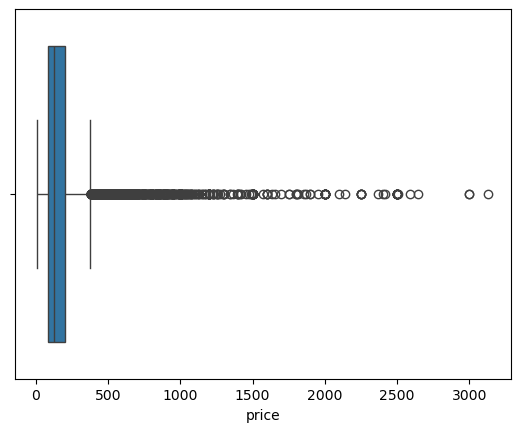

In [28]:
#Checking outlier using std()
#Visual outlier data of price columns:
sns.boxplot(data = df, x = 'price')


<Axes: xlabel='price', ylabel='Count'>

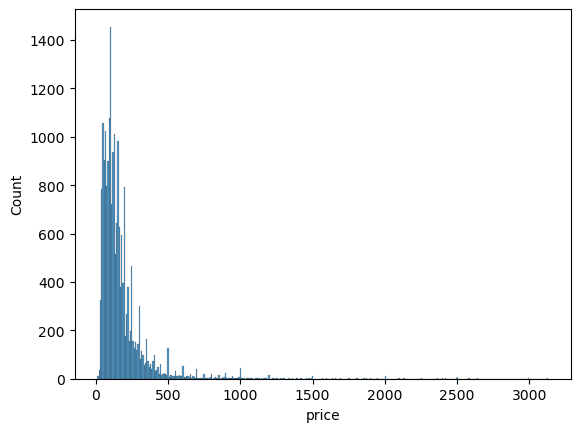

In [29]:
#Visual outlier data of price columns:
sns.histplot(data = df, x = 'price')

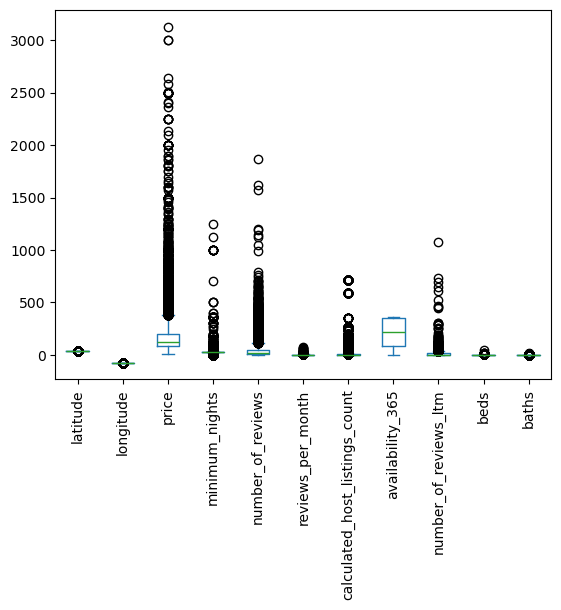

In [30]:
#ReCheck Outlier: 
#Visual outlier data of columns:
df.plot(kind='box')
plt.tick_params(axis='x', rotation=90)

In [31]:
outlier_col = ['minimum_nights','number_of_reviews','number_of_reviews_ltm'] #Get all the columns has a lot of outlier:

In [32]:
for col in outlier_col:
    outlier_median(col) #Replace outlier data by mean()

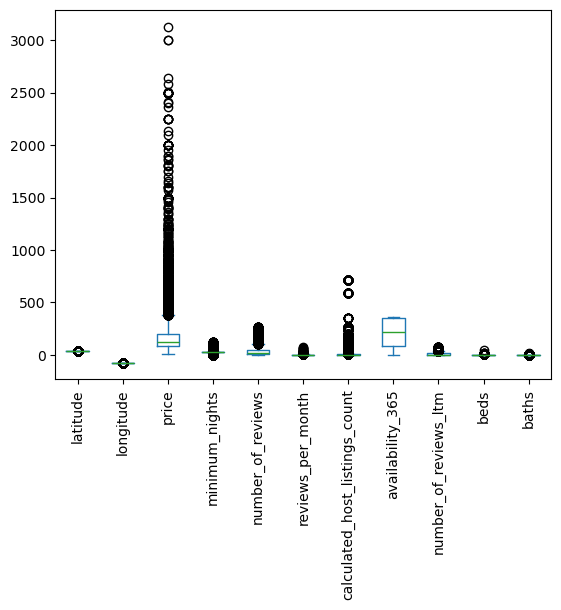

In [33]:
#ReCheck Outlier: 
#Visual outlier data of columns:
df.plot(kind='box')
plt.tick_params(axis='x', rotation=90)

In [34]:
#Analyez:

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20711 entries, 1 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20711 non-null  object        
 1   name                            20711 non-null  object        
 2   host_id                         20711 non-null  object        
 3   host_name                       20711 non-null  object        
 4   neighbourhood_group             20711 non-null  object        
 5   neighbourhood                   20711 non-null  object        
 6   latitude                        20711 non-null  float64       
 7   longitude                       20711 non-null  float64       
 8   room_type                       20711 non-null  object        
 9   price                           20711 non-null  float64       
 10  minimum_nights                  20711 non-null  float64       
 11  number_

<Axes: xlabel='longitude', ylabel='latitude'>

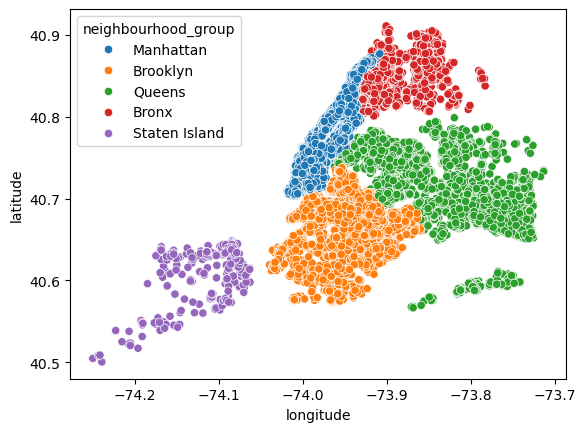

In [90]:
#Geographical Distribution of AirBnB Listing:
#By Neighbourhood Group
sns.scatterplot(data = df, x = df['longitude'], y = df['latitude'], hue = 'neighbourhood_group')


<Axes: xlabel='longitude', ylabel='latitude'>

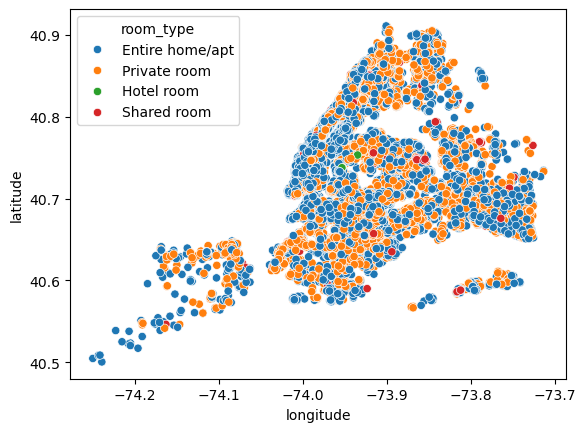

In [92]:
#Geographical Distribution of AirBnB Listing:
#By Room type
sns.scatterplot(data = df, x = df['longitude'], y = df['latitude'], hue = 'room_type')

In [37]:
#Get the list of num type columns :
num_columns = list(df.describe().columns)
#Get columns from price
num_columns = num_columns[2:]
#Get all the num columns correlations:
num_columns_corr = df[num_columns].corr()
num_columns_corr

,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds,baths
price,1.000000,-0.113933,-0.040489,-0.052978,-0.020864,-0.019841,0.049839,-0.042598,0.387430,0.355545
minimum_nights,-0.113933,1.000000,-0.072329,-0.215499,-0.287598,0.079048,0.047183,-0.204176,-0.062879,-0.001605
number_of_reviews,-0.040489,-0.072329,1.000000,0.148122,0.366258,-0.139703,-0.046508,0.510925,0.058735,-0.051415
last_review,-0.052978,-0.215499,0.148122,1.000000,0.254118,-0.028672,0.154738,0.320979,0.047415,-0.000340
reviews_per_month,-0.020864,-0.287598,0.366258,0.254118,1.000000,-0.108625,-0.040835,0.552930,0.047844,-0.027857
calculated_host_listings_count,-0.019841,0.079048,-0.139703,-0.028672,-0.108625,1.000000,0.046561,-0.136780,-0.070984,-0.007315
availability_365,0.049839,0.047183,-0.046508,0.154738,-0.040835,0.046561,1.000000,-0.038262,0.064773,0.049301
number_of_reviews_ltm,-0.042598,-0.204176,0.510925,0.320979,0.552930,-0.136780,-0.038262,1.000000,0.080473,-0.030475
beds,0.387430,-0.062879,0.058735,0.047415,0.047844,-0.070984,0.064773,0.080473,1.000000,0.417103
baths,0.355545,-0.001605,-0.051415,-0.000340,-0.027857,-0.007315,0.049301,-0.030475,0.417103,1.000000


Text(0.5, 1.0, 'Num type columns correlation')

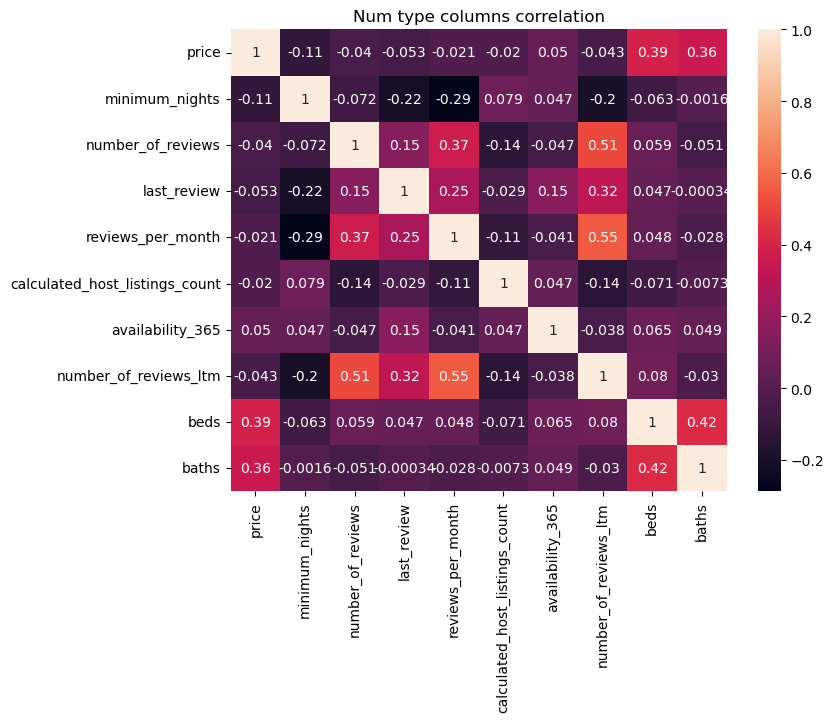

In [94]:
#Visuai the correlation of numeric columns:
plt.figure(figsize = (8,6))
sns.heatmap(data = num_columns_corr, annot = True)
plt.title('Num type columns correlation')

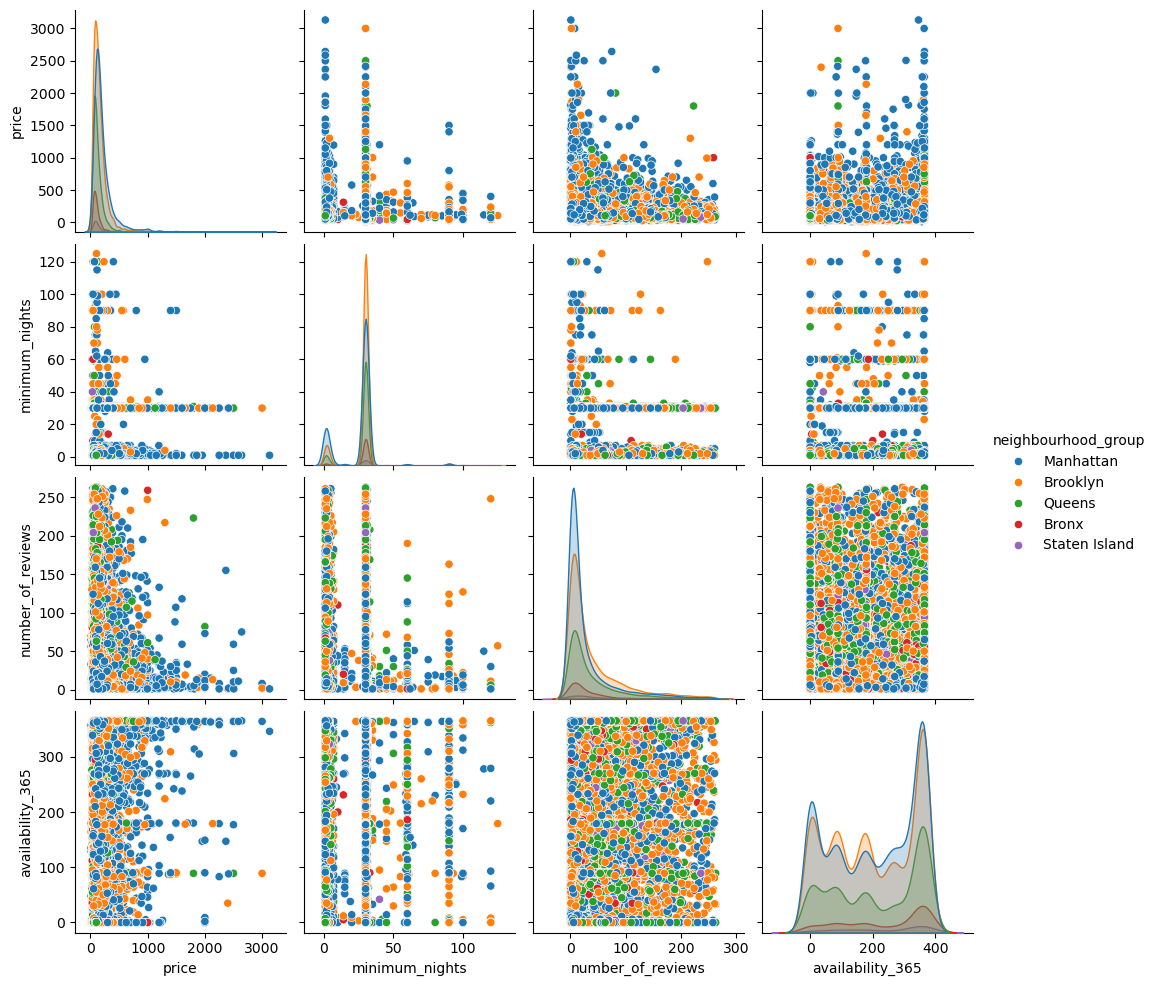

In [39]:
#Visualize the correlation betweern Price, Minimum nights, Number of Reviews and Availability_365 columns
sns.pairplot(data = df, vars = ['price', 'minimum_nights', 'number_of_reviews','availability_365'], hue = 'neighbourhood_group')

<Axes: xlabel='price', ylabel='number_of_reviews'>

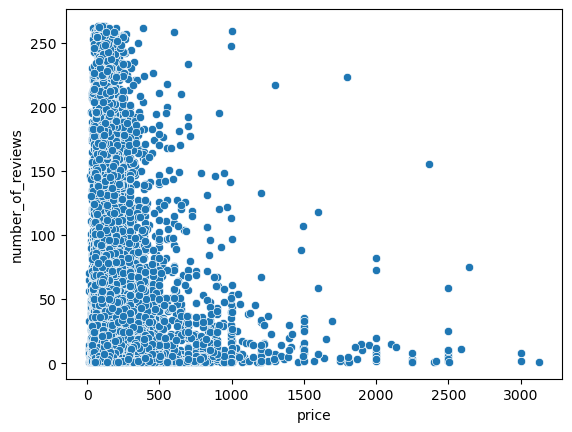

In [98]:
#consider the relationship between Price and Number of Reviews:
sns.scatterplot(data = df , x = df['price'], y  = df['number_of_reviews'])
#The higher Price the lower Number of Review

price
neighbourhood_group room_type                 
Bronx               Entire home/apt    58127.0
                    Private room       43063.0
                    Shared room         1310.0
Brooklyn            Entire home/apt   842650.0
                    Hotel room           651.0
                    Private room      351372.0
                    Shared room        12729.0
Manhattan           Entire home/apt  1305052.0
                    Hotel room         31726.0
                    Private room      382621.0
                    Shared room        14731.0
Queens              Entire home/apt   275492.0
                    Hotel room          1160.0
                    Private room      182654.0
                    Shared room         6304.0
Staten Island       Entire home/apt    21817.0
                    Private room       12103.0
                    Shared room          645.0

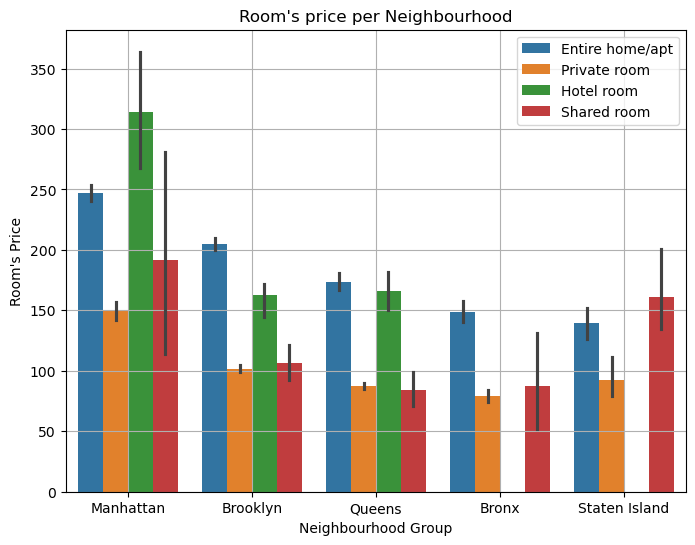

In [40]:
#Price per Neighbourhood(Price dependency on Neighbourhood) :
#Visualize Price per Neighbourhood
plt.figure(figsize = (8,6))
sns.barplot(data = df, x = 'neighbourhood_group', y ='price', hue = 'room_type')
plt.xlabel('Neighbourhood Group')
plt.ylabel("Room's Price")
plt.title("Room's price per Neighbourhood")
plt.legend()
plt.grid()
#Table of Price per Neighbourhood:
df.groupby(['neighbourhood_group','room_type']).agg({'price':'sum'})


price
neighbourhood_group room_type                 
Bronx               Entire home/apt    58127.0
                    Private room       43063.0
                    Shared room         1310.0
Brooklyn            Entire home/apt   842650.0
                    Hotel room           651.0
                    Private room      351372.0
                    Shared room        12729.0
Manhattan           Entire home/apt  1305052.0
                    Hotel room         31726.0
                    Private room      382621.0
                    Shared room        14731.0
Queens              Entire home/apt   275492.0
                    Hotel room          1160.0
                    Private room      182654.0
                    Shared room         6304.0
Staten Island       Entire home/apt    21817.0
                    Private room       12103.0
                    Shared room          645.0

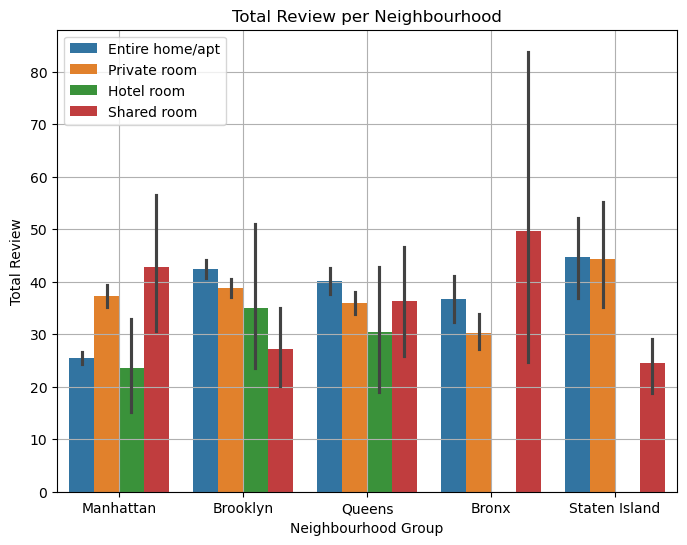

In [41]:
#Total of Views per Neighbourhood(Price dependency on Neighbourhood) :
#Visualize Total of Views per Neighbourhood
plt.figure(figsize = (8,6))
sns.barplot(data = df, x = 'neighbourhood_group', y ='number_of_reviews', hue = 'room_type')
plt.xlabel('Neighbourhood Group')
plt.ylabel("Total Review")
plt.title("Total Review per Neighbourhood")
plt.legend()
plt.grid()
#Table of Price per Neighbourhood:
df.groupby(['neighbourhood_group','room_type']).agg({'price':'sum'})


In [112]:
#Insert Month-Year columns:
df['month_year'] = df['last_review'].dt.to_period('M')
df['month_year'] = df['month_year'].astype(str)
df['month_year'] = pd.to_datetime(df['month_year'])
#Groupby Last review columns by Month-Year
review_time = df.groupby(df['month_year']).agg({'last_review':'count'})

,last_review
month_year,
2011-10-01,1
2012-01-01,1
2012-09-01,1
2012-10-01,2
2012-11-01,1
...,...
2024-01-01,210
2024-02-01,179
2024-03-01,96


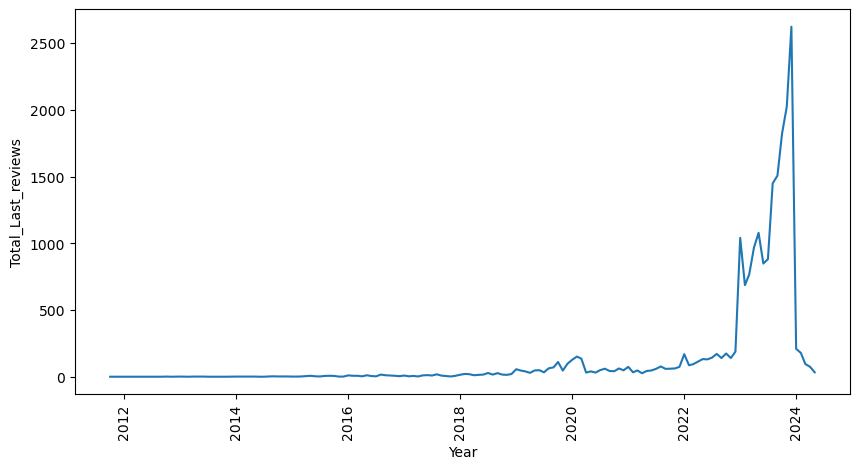

In [114]:
#Visual Last Review by time:
x = review_time.index
y = review_time['last_review']


plt.figure(figsize = (10,5))
plt.plot(x,y)
plt.xlabel('Year')
plt.ylabel('Total_Last_reviews')
plt.xticks(rotation=90)

#Last review Group table
review_time